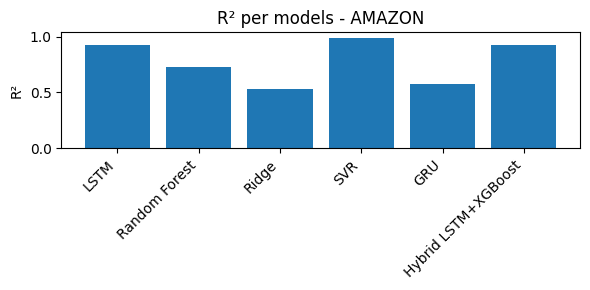

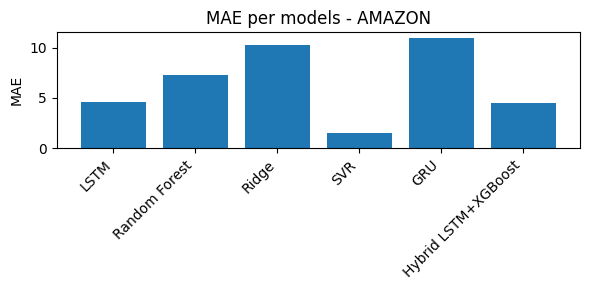

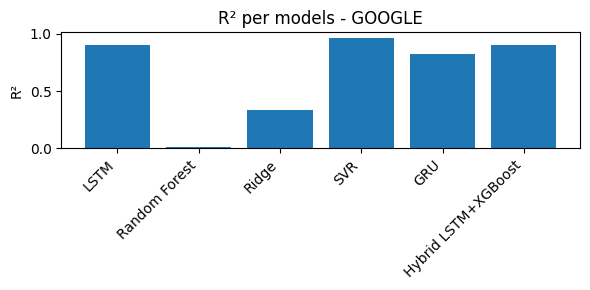

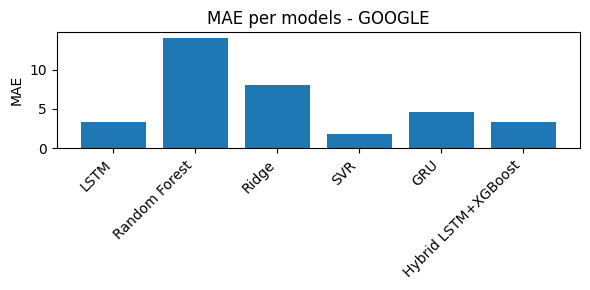

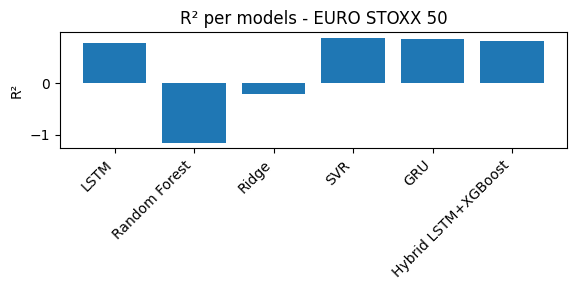

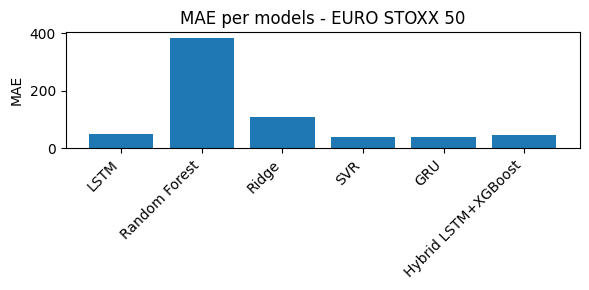

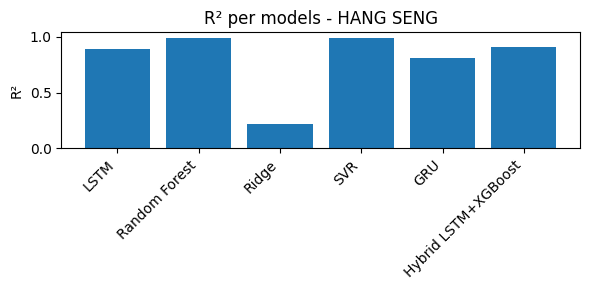

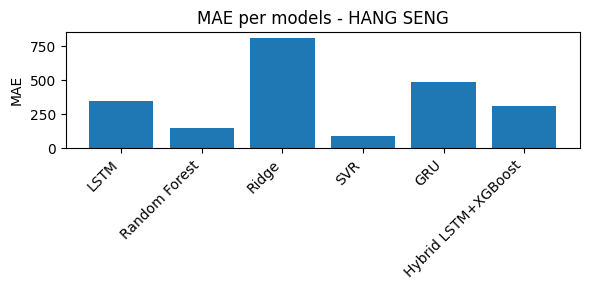

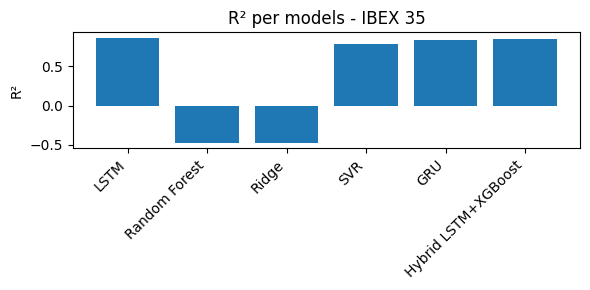

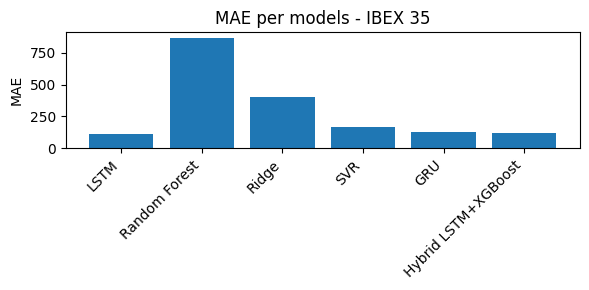

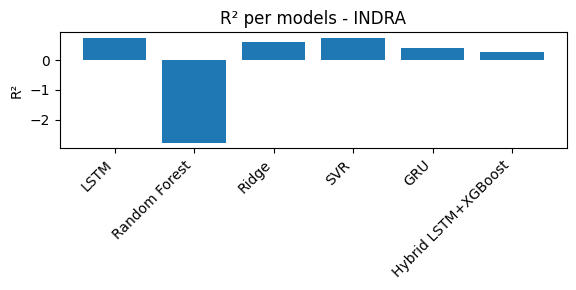

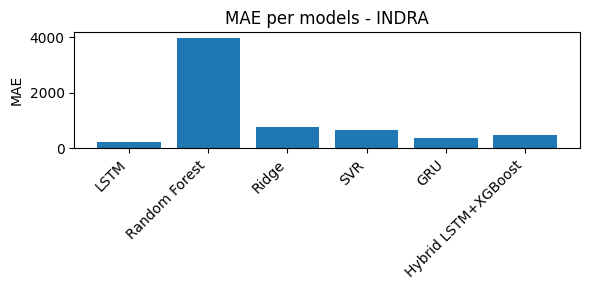

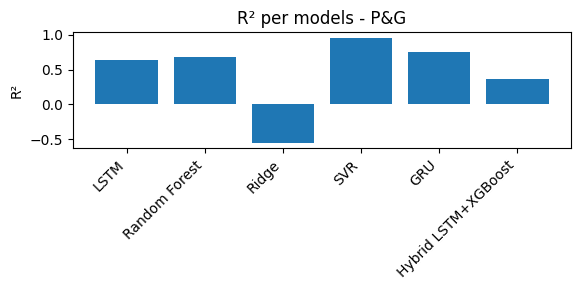

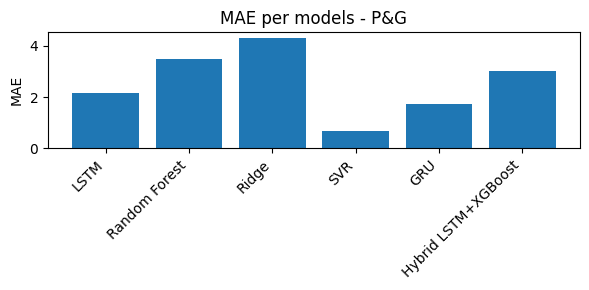

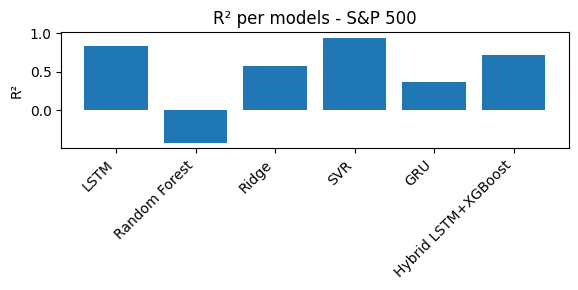

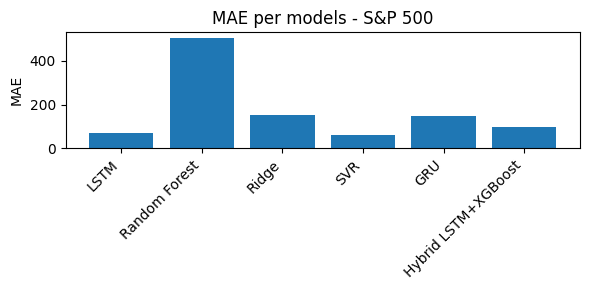

=== Mitjana global de R² per model ===
                 Model        R2
5                  SVR  0.908525
2                 LSTM  0.823688
1  Hybrid LSTM+XGBoost  0.718387
0                  GRU  0.679725
4                Ridge  0.126750
3        Random Forest -0.304025

=== Mitjana global de MAE per model ===
                 Model         MAE
2                 LSTM  103.450850
5                  SVR  125.408038
1  Hybrid LSTM+XGBoost  133.090325
0                  GRU  149.346387
4                Ridge  284.839600
3        Random Forest  738.119688


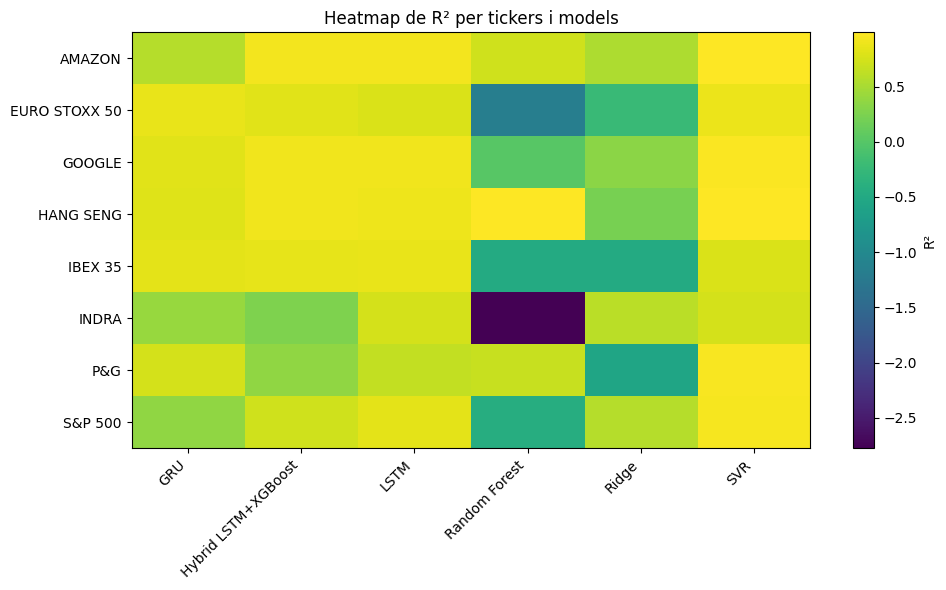

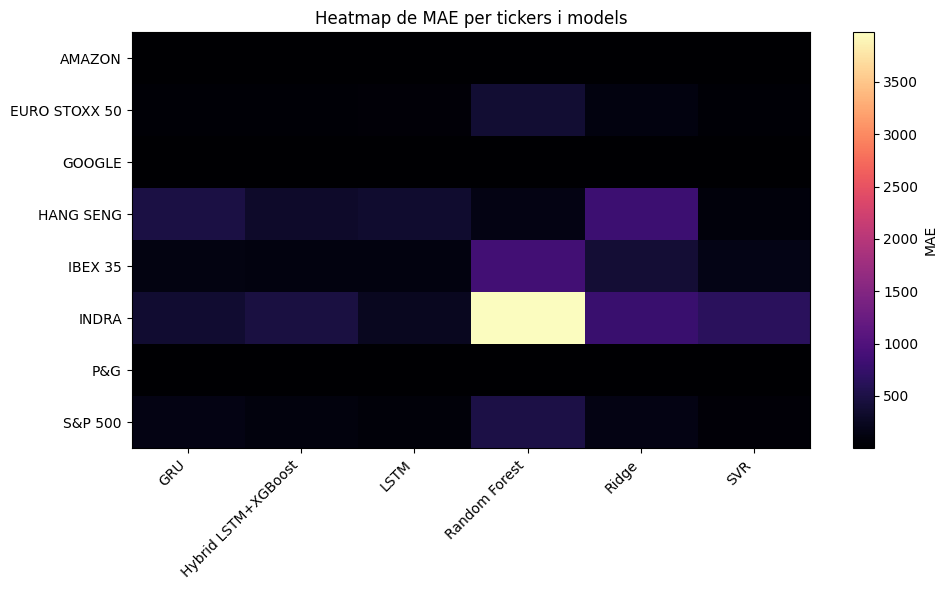

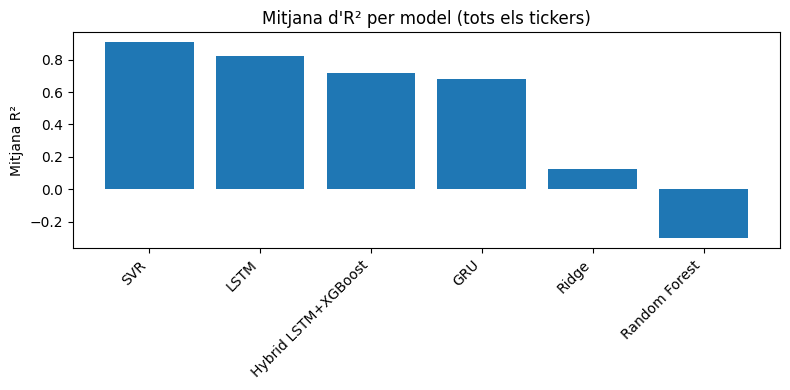

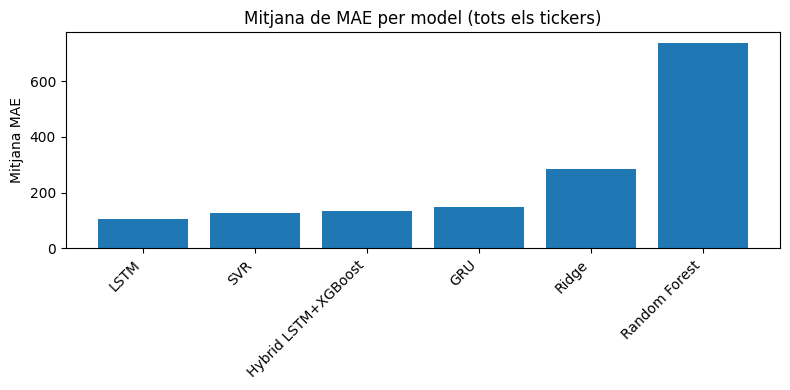

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) Llegeix el CSV amb els resultats
csv_path = "resultats_models.csv"  # Assegura’t que aquest fitxer estigui al directori de treball
df = pd.read_csv(csv_path)

# 2) Visualització ràpida per cada ticker: barplots de R² i MAE
tickers = df["Ticker"].unique()
for ticker in tickers:
    group = df[df["Ticker"] == ticker]
    
    # Barplot R²
    plt.figure(figsize=(6, 3))
    plt.bar(group["Model"], group["R2"])
    plt.title(f"R² per models - {ticker}")
    plt.ylabel("R²")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
    
    # Barplot MAE
    plt.figure(figsize=(6, 3))
    plt.bar(group["Model"], group["MAE"])
    plt.title(f"MAE per models - {ticker}")
    plt.ylabel("MAE")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# 3) Extensió: filtrar models i calcular mitjanes globals
#    Exemple de filtrat: només models de xarxes neuronals
nn_models = ["LSTM", "GRU", "Hybrid LSTM+XGBoost"]
df_nn = df[df["Model"].isin(nn_models)]

# Mitjana global d'R² per model (sobre tots els tickers)
avg_r2 = df.groupby("Model")["R2"].mean().reset_index().sort_values(by="R2", ascending=False)
# Mitjana global de MAE per model
avg_mae = df.groupby("Model")["MAE"].mean().reset_index().sort_values(by="MAE")

# Mostra per pantalla (o amb display(df) si estàs en Jupyter)
print("=== Mitjana global de R² per model ===")
print(avg_r2)
print("\n=== Mitjana global de MAE per model ===")
print(avg_mae)

# 4) Heatmaps de R² i MAE
pivot_r2 = df.pivot(index="Ticker", columns="Model", values="R2")
pivot_mae = df.pivot(index="Ticker", columns="Model", values="MAE")

# Heatmap de R²
plt.figure(figsize=(10, 6))
im = plt.imshow(pivot_r2, aspect='auto', cmap='viridis')
plt.colorbar(im, label='R²')
plt.xticks(ticks=np.arange(len(pivot_r2.columns)), labels=pivot_r2.columns, rotation=45, ha="right")
plt.yticks(ticks=np.arange(len(pivot_r2.index)), labels=pivot_r2.index)
plt.title("Heatmap de R² per tickers i models")
plt.tight_layout()
plt.show()

# Heatmap de MAE
plt.figure(figsize=(10, 6))
im2 = plt.imshow(pivot_mae, aspect='auto', cmap='magma')
plt.colorbar(im2, label='MAE')
plt.xticks(ticks=np.arange(len(pivot_mae.columns)), labels=pivot_mae.columns, rotation=45, ha="right")
plt.yticks(ticks=np.arange(len(pivot_mae.index)), labels=pivot_mae.index)
plt.title("Heatmap de MAE per tickers i models")
plt.tight_layout()
plt.show()

# 5) Comparacions conjuntes: barplot de mitjana d'R² per model
plt.figure(figsize=(8, 4))
plt.bar(avg_r2["Model"], avg_r2["R2"])
plt.title("Mitjana d'R² per model (tots els tickers)")
plt.ylabel("Mitjana R²")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 6) Comparacions conjuntes: barplot de mitjana de MAE per model
plt.figure(figsize=(8, 4))
plt.bar(avg_mae["Model"], avg_mae["MAE"])
plt.title("Mitjana de MAE per model (tots els tickers)")
plt.ylabel("Mitjana MAE")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
